# 12주차(화) 실습문제 - 단순회귀모델 (Ch.5.1)

제출시 HTML(.html) 형식으로 다운로드한 뒤, 올려주세요.

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 선형모델을 추정하는 라이브러리 (경고가 나올 수 있음)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시 자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

data = pd.read_csv("health2018.csv")
man20 = data[(data.sex == 'M') & (data.age <= 20)]  # 만 20세 이하 남성 데이터

---

## 1. statsmodels를 이용한 모델링
### 1-1. man20에서 키와 몸무게 간의 회귀직선을 그리고, 키로 몸무게를 예측하는 선형회귀모델(모델 1)을 만들어라.
키와 몸무게 간에 양의 상관관계가 있다고 볼 수 있는가?

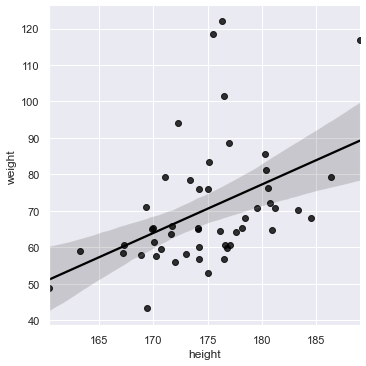

In [8]:
sns.lmplot(x = "height", y = "weight", data = man20,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

In [9]:
lm_model = smf.ols(formula = "weight ~ height", data = man20).fit()

### 1-2. 모델 1에 따르면 키가 1cm 커질 때마다 몸무게는 약 몇 kg씩 증가하는가? 또한 모델 1을 이용해 키가 170, 175, 180cm인 남성의 몸무게를 예측하시오.

In [17]:
lm_model.params
# 약 1.3kg씩 증가한다

Intercept   -162.151716
height         1.330112
dtype: float64

In [10]:
lm_model.predict()

array([60.243, 70.618, 69.554, 70.751, 72.613, 81.658, 69.421, 62.504,
       63.834, 65.43 , 54.922, 72.746, 75.14 , 89.239, 69.554, 63.169,
       69.421, 78.465, 78.199, 66.228, 71.283, 64.898, 60.376, 67.027,
       64.233, 72.347, 72.081, 67.958, 76.603, 77.667, 72.613, 78.066,
       66.095, 51.198, 69.554, 63.967, 63.036, 85.781, 66.627, 73.411,
       70.618, 83.254, 64.1  , 74.874, 78.864, 73.012, 68.49 , 73.278,
       77.8  , 74.076])

In [11]:
lm_model.predict(pd.DataFrame({"height":[170]}))

0    63.967249
dtype: float64

In [12]:
lm_model.predict(pd.DataFrame({"height":[175]}))

0    70.617807
dtype: float64

In [13]:
lm_model.predict(pd.DataFrame({"height":[180]}))

0    77.268364
dtype: float64

### 1-3. 모델 1의 summary를 출력하고 잔차의 히스토그램을 그리시오. 모델 1의 잔차는 정규분포 모양을 벗어나는지? Skewness와 Kurtosis 측면에서는 어떠한가?

In [14]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     11.60
Date:                Tue, 18 May 2021   Prob (F-statistic):            0.00134
Time:                        17:52:35   Log-Likelihood:                -205.81
No. Observations:                  50   AIC:                             415.6
Df Residuals:                      48   BIC:                             419.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -162.1517     68.344     -2.373      0.022    -299.566     -24.738
height         1.3301      0.390      3.406      0.001       0.545       2.115
==============================================================================
Omnibus:                       23.888   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.083
Skew:                           1.615   Prob(JB):                     1.46e-08
Kurtosis:                       5.624   Cond. No.                     5.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


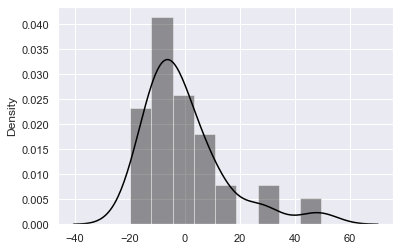

In [16]:
sns.distplot(lm_model.resid, color = 'black')
# 정규분포 모양에서 벗어난다
# Skew는 1.615로 오른쪽 꼬리가 길다
# Kurtosis는 5.624로 정규분포보다 뾰족한 분포이다

---

## 2.모델의 비교, 결정계수와 잔차
### 2-1. 허리둘레(waist)로 몸무게를 예측하는 선형회귀모델(모델 2)을 만들고, 회귀직선 그래프를 그리시오.

In [18]:
lm_model2 = smf.ols(formula = "weight ~ waist", data = man20).fit()

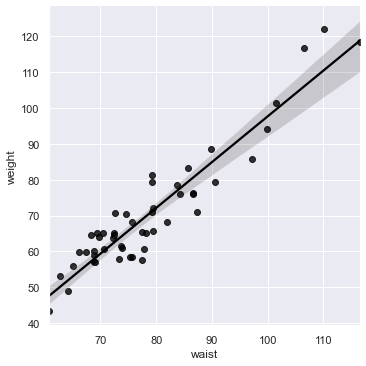

In [19]:
sns.lmplot(x = "waist", y = "weight", data = man20,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

### 2-2. 모델1과 모델2를 로그우도, AIC 및 결정계수(R^2) 면에서 각각 비교하라.
어느 모델이 더 우월한가?

In [22]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     11.60
Date:                Tue, 18 May 2021   Prob (F-statistic):            0.00134
Time:                        18:01:00   Log-Likelihood:                -205.81
No. Observations:                  50   AIC:                             415.6
Df Residuals:                      48   BIC:                             419.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -162.1517     68.344     -2.373      0.022    -299.566     -24.738
height         1.3301      0.390      3.406      0.001       0.545       2.115
==============================================================================
Omnibus:                       23.888   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.083
Skew:                           1.615   Prob(JB):                     1.46e-08
Kurtosis:                       5.624   Cond. No.                     5.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
lm_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     371.3
Date:                Tue, 18 May 2021   Prob (F-statistic):           3.11e-24
Time:                        18:01:07   Log-Likelihood:                -157.03
No. Observations:                  50   AIC:                             318.1
Df Residuals:                      48   BIC:                             321.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -30.1343      5.286     -5.700      0.000     -40.763     -19.505
waist          1.2782      0.066     19.270      0.000       1.145       1.412
==============================================================================
Omnibus:                        1.343   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.511   Jarque-Bera (JB):                1.027
Skew:                           0.024   Prob(JB):                        0.599
Kurtosis:                       2.300   Cond. No.                         522.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
lm_model.llf,lm_model2.llf
# lm_model2의 로그우도값이 더 좋다
# lm_model2의 로그우도값의 절대값이 더 작음 

(-205.80642230521485, -157.03253591400573)

In [21]:
lm_model.aic,lm_model2.aic
# lm_model2의 aic값이 더 좋다
# lm_model2의 aic값이 더 작음

(415.6128446104297, 318.06507182801147)

In [24]:
lm_model.rsquared,lm_model2.rsquared
# lm_model2의 변동분산예측 정도가 더 높다

(0.1946771651286323, 0.8855328618798377)

In [ ]:
#lm_model2가 더 우월한 모델이다

### 2-3. 모델2의 summary를 출력하고 잔차의 히스토그램을 그리시오. 모델 2의 잔차는 정규분포와 비교해서 어떠한가?

In [26]:
lm_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     371.3
Date:                Tue, 18 May 2021   Prob (F-statistic):           3.11e-24
Time:                        18:05:03   Log-Likelihood:                -157.03
No. Observations:                  50   AIC:                             318.1
Df Residuals:                      48   BIC:                             321.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -30.1343      5.286     -5.700      0.000     -40.763     -19.505
waist          1.2782      0.066     19.270      0.000       1.145       1.412
==============================================================================
Omnibus:                        1.343   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.511   Jarque-Bera (JB):                1.027
Skew:                           0.024   Prob(JB):                        0.599
Kurtosis:                       2.300   Cond. No.                         522.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


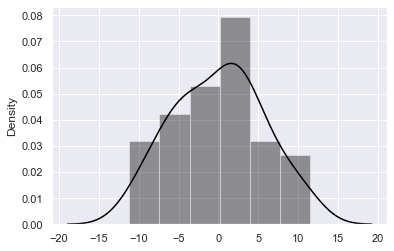

In [28]:
sns.distplot(lm_model2.resid, color = 'black')
# skew가 0에 가까우므로 대칭에 가깝고 (오른쪽 꼬리가 김)
# Kurtosis가 2.3이므로 정규분포보다 덜 뾰족한 분포이다

### 2-4. 모델 1과 모델 2의 잔차를 Q-Q 플롯으로 그려 비교해보시오.

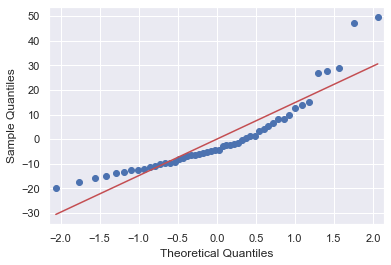

In [29]:
fig = sm.qqplot(lm_model.resid, line = "s")

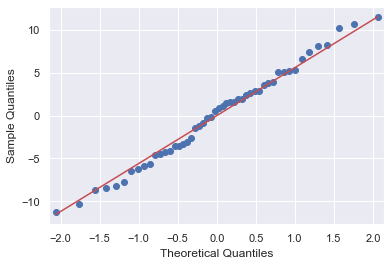

In [30]:
fig = sm.qqplot(lm_model2.resid, line = "s")

In [ ]:
#모델1보다 모델2의 잔차가 정규분포에 근접하다